# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [57]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_data = []

In [58]:
print("Beginning Data Retrieval")
print("-----------------------------")

setCount = 1
recordCount = 1

for i, city in enumerate(cities):
    if(i % 50 == 0 and i > 0):
        setCount += 1
        recordCount = 1
        
    print(f"Processing Record {recordCount} of set {setCount} | {city}")
    recordCount += 1
    response = requests.get(query_url + city).json()
    try:
        city_data.append({'City':city,
                     'Lat':response['coord']['lat'],
                     'Lon':response['coord']['lon'],
                     'Max Temp':response['main']['temp_max'],
                     'Humidity':response['main']['humidity'],
                     'Cloudiness':response['clouds']['all'],
                     'Wind Speed':response['wind']['speed'],
                     'Country':response['sys']['country'],
                     'Date':response['dt']})
    except (KeyError, IndexError):
          print("City not found. Skipping...")   
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | nanortalik
Processing Record 2 of set 1 | nome
Processing Record 3 of set 1 | machinga
Processing Record 4 of set 1 | mataura
Processing Record 5 of set 1 | torbay
Processing Record 6 of set 1 | busselton
Processing Record 7 of set 1 | alvorada
Processing Record 8 of set 1 | dwarka
Processing Record 9 of set 1 | krasnopavlivka
Processing Record 10 of set 1 | warrnambool
Processing Record 11 of set 1 | mandla
Processing Record 12 of set 1 | nhulunbuy
Processing Record 13 of set 1 | nikolskoye
Processing Record 14 of set 1 | lebu
Processing Record 15 of set 1 | tumannyy
City not found. Skipping...
Processing Record 16 of set 1 | puerto ayora
Processing Record 17 of set 1 | sur
Processing Record 18 of set 1 | fortuna
Processing Record 19 of set 1 | khatanga
Processing Record 20 of set 1 | zhigansk
Processing Record 21 of set 1 | barrow
Processing Record 22 of set 1 | roblin
Processing Record 23 of set 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
cdata_df = pd.DataFrame(city_data)
cdata_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nanortalik,60.14,-45.24,11.08,52,51,5.38,GL,1594931943
1,nome,64.50,-165.41,13.89,82,90,2.60,US,1594931943
2,machinga,-15.17,35.30,11.93,82,15,2.68,MW,1594931943
3,mataura,-46.19,168.86,-1.33,98,20,0.94,NZ,1594931944
4,torbay,47.67,-52.73,9.44,100,90,8.20,CA,1594931915
...,...,...,...,...,...,...,...,...,...
571,pangoa,-12.12,-73.00,27.78,56,5,2.42,PE,1594932065
572,milagros,12.22,123.51,26.14,87,93,2.91,PH,1594932065
573,cairo montenotte,44.40,8.27,23.33,73,1,1.42,IT,1594932066
574,grindavik,63.84,-22.43,10.00,93,90,4.10,IS,1594932066


In [60]:
cdata_df.to_csv("city_data.csv", encoding="utf-8", index=False)

In [61]:
cdata_df.count()

City          576
Lat           576
Lon           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [62]:
hum = cdata_df.loc[cdata_df["Humidity"] > 100, :]
hum

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [63]:
cdata_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,19.552135,16.709531,20.539097,70.104167,48.862847,3.411597,1.594932e+09
std,32.934618,88.823400,7.876521,20.759398,38.125928,2.303258,7.775249e+01
min,-54.800000,-179.170000,-1.330000,3.000000,0.000000,0.070000,1.594932e+09
25%,-8.470000,-59.757500,14.440000,58.000000,6.750000,1.697500,1.594932e+09
50%,23.095000,18.560000,21.155000,75.000000,47.000000,2.880000,1.594932e+09
75%,46.547500,95.517500,26.110000,87.000000,88.000000,4.615000,1.594932e+09
max,78.220000,179.320000,43.330000,100.000000,100.000000,14.290000,1.594932e+09


In [64]:
#  Get the indices of cities that have humidity over 100%.


In [65]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [66]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

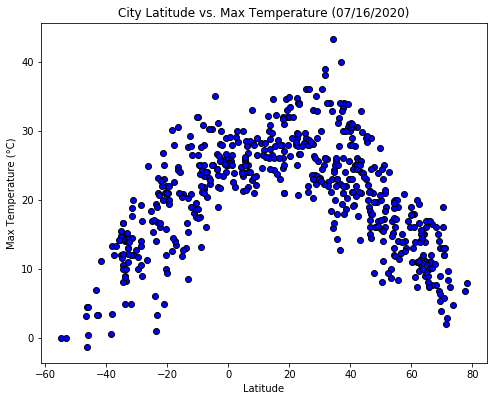

In [74]:
city_lat = cdata_df["Lat"]
city_temp = cdata_df["Max Temp"]

plt.figure(figsize=(8,6.25))
plt.scatter(city_lat, city_temp, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.show()

City latitude vs Max Temperature scatter plot shows there is a bell curve distribution between Southern-most & Northern-most latitudes and temperature: In other words, as city latitudes became further distributed north/ south from the equator (latitude of 0), outside a couple outliers, the temperature dipped lower.

## Latitude vs. Humidity Plot

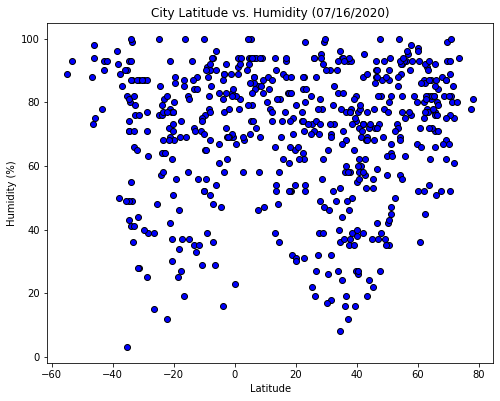

In [75]:
city_lat = cdata_df["Lat"]
city_hum = cdata_df["Humidity"]

plt.figure(figsize=(8,6.25))
plt.scatter(city_lat, city_hum, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

City Latitude vs Humidity shows a relatively distributed spread, with no distinct relationship, but less humidity at the extreme latitude poles.

## Latitude vs. Cloudiness Plot

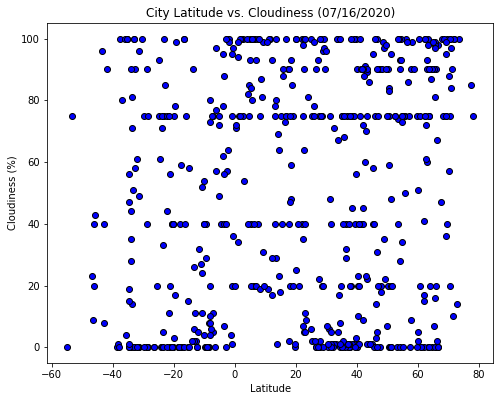

In [76]:
city_lat = cdata_df["Lat"]
city_cloud = cdata_df["Cloudiness"]

plt.figure(figsize=(8,6.25))
plt.scatter(city_lat, city_cloud, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

City latitude vs cloudiness showed interesting distributions across certain percentages of cloudiness throughout the latitudes.

## Latitude vs. Wind Speed Plot

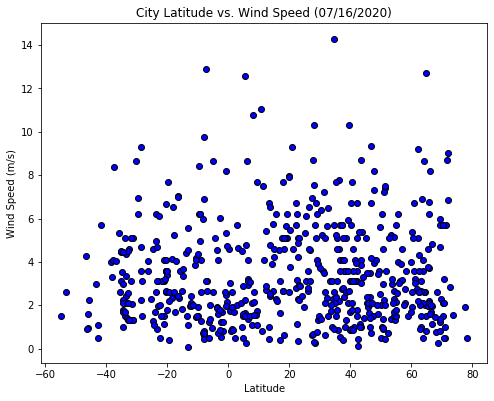

In [136]:
city_lat = cdata_df["Lat"]
city_wspd = cdata_df["Wind Speed"]

plt.figure(figsize=(8,6.25))
plt.scatter(city_lat, city_wspd, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

City Latitude vs Wind Speed showed a distribution more concentrated within 6 m/s throughout the latitudes. 

## Linear Regression

In [137]:
# OPTIONAL: Create a function to create Linear Regression plots

In [138]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

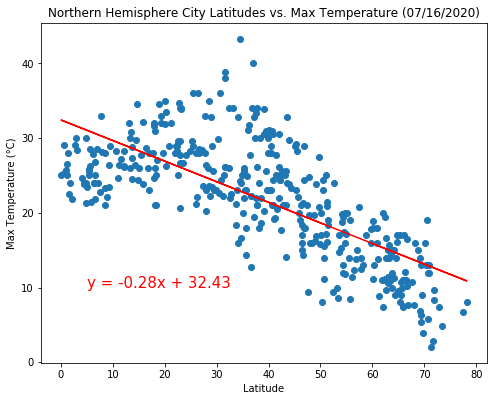

The r-squared is: -0.722


In [139]:
nh_df = cdata_df.loc[cdata_df["Lat"] >= 0]
nh_lat = nh_df["Lat"]
nh_mtemp = nh_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_mtemp)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(nh_lat, nh_mtemp)
plt.plot(nh_lat,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitudes vs. Max Temperature (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

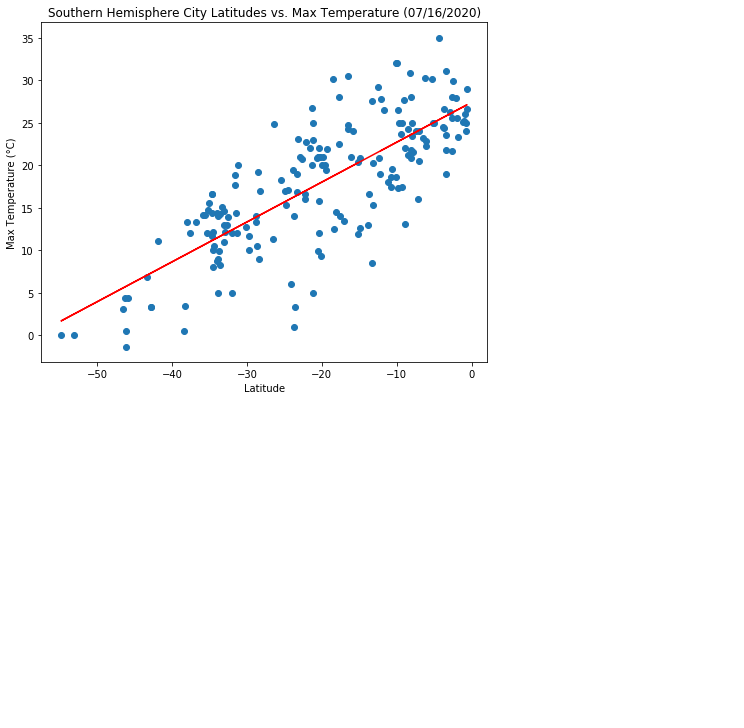

The r-squared is: 0.779


In [140]:
sh_df = cdata_df.loc[cdata_df["Lat"] < 0]
sh_lat = sh_df["Lat"]
sh_mtemp = sh_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_mtemp)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(sh_lat, sh_mtemp)
plt.plot(sh_lat,regress_values,"r-")
plt.annotate(line_eq,(17,-45),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitudes vs. Max Temperature (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

Northern hemisphere showed a negative regression/ relationship between latitude & max temperature, while the southern hemisphere showed a positive regression. This tells us that in the northern latitudes, the further you got from the equator, the temperature became colder (closer to 0); whereas, in the southern latitudes,  the closer you got to the equator, the temperature became warmer (climbed higher from 0).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

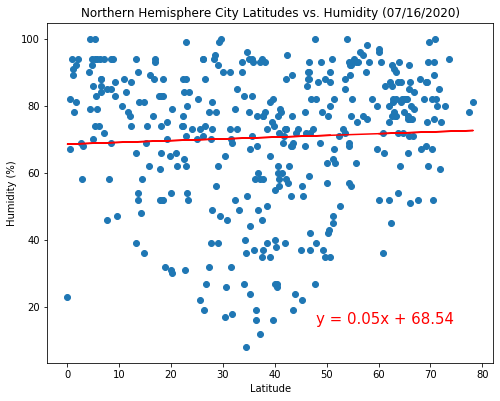

The r-squared is: 0.051


In [141]:
nh_df = cdata_df.loc[cdata_df["Lat"] >= 0]
nh_lat = nh_df["Lat"]
nh_hum = nh_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_hum)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(nh_lat, nh_hum)
plt.plot(nh_lat,regress_values,"r-")
plt.annotate(line_eq,(48,15),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitudes vs. Humidity (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

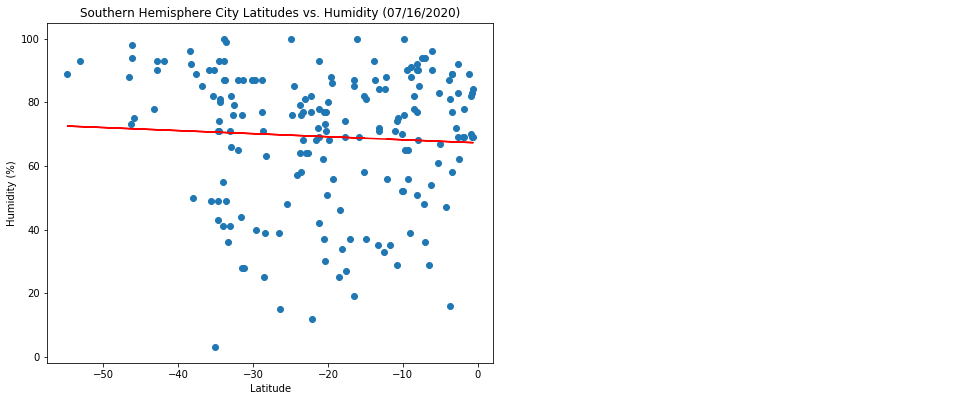

The r-squared is: -0.057


In [142]:
sh_df = cdata_df.loc[cdata_df["Lat"] < 0]
sh_lat = sh_df["Lat"]
sh_hum = sh_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_hum)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(sh_lat, sh_hum)
plt.plot(sh_lat,regress_values,"r-")
plt.annotate(line_eq,(48,15),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitudes vs. Humidity (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

When comparing the hemispheres and humidity, there is a slight negative relationship between humidity in the southern hemisphere, meaning as the cities got closer to the equator, it got slightly less humid... this might seem counterintuitive, HOWEVER, it is currently winter in the southern hemisphere which might affect this. Northern hemisphere had a similar value for it's regression, only positive, as the latitude increased. Climate change doesn't help with humidity either, but that is an outside factor not computed in this model.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

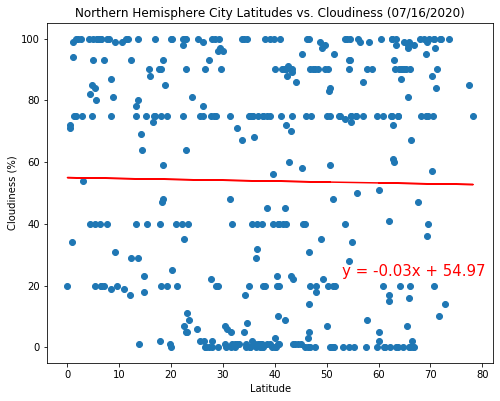

The r-squared is: -0.015


In [143]:
nh_df = cdata_df.loc[cdata_df["Lat"] >= 0]
nh_lat = nh_df["Lat"]
nh_cloud = nh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_cloud)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(nh_lat, nh_cloud)
plt.plot(nh_lat,regress_values,"r-")
plt.annotate(line_eq,(53,23),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitudes vs. Cloudiness (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

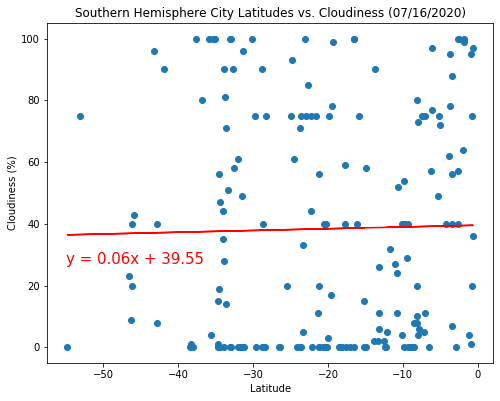

The r-squared is: 0.020


In [144]:
sh_df = cdata_df.loc[cdata_df["Lat"] < 0]
sh_lat = sh_df["Lat"]
sh_cloud = sh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_cloud)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(sh_lat, sh_cloud)
plt.plot(sh_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,27),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitudes vs. Cloudiness (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

For the hemispheres vs cloudiness, the most visible relationship for this, is in the southern hemisphere, where there was a slight positive relationship between latitude and cloudiness percentage; meaning, as latitudes got closer to 0 (equator), cloudiness increased ever-so-slightly. The northern hemisphere showed less of a relationship, but it trended negatively.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

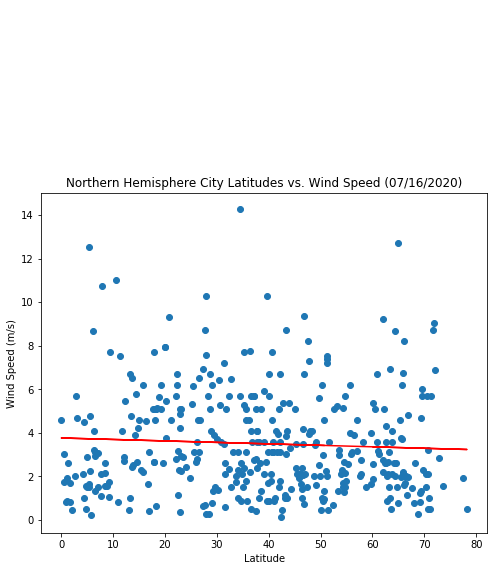

The r-squared is: -0.057


In [145]:
nh_df = cdata_df.loc[cdata_df["Lat"] >= 0]
nh_lat = nh_df["Lat"]
nh_wspd = nh_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_wspd)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(nh_lat, nh_wspd)
plt.plot(nh_lat,regress_values,"r-")
plt.annotate(line_eq,(53,23),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitudes vs. Wind Speed (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

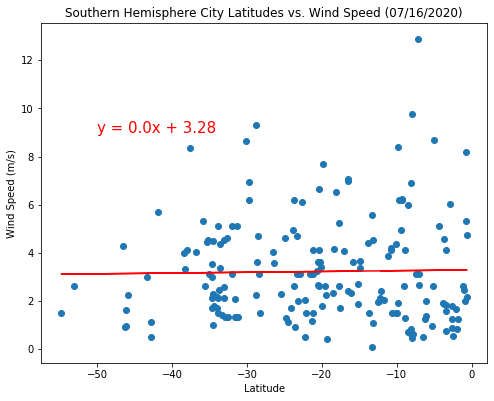

The r-squared is: 0.020


In [146]:
sh_df = cdata_df.loc[cdata_df["Lat"] < 0]
sh_lat = sh_df["Lat"]
sh_wspd = sh_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_wspd)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,6.25))
plt.scatter(sh_lat, sh_wspd)
plt.plot(sh_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,9),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitudes vs. Wind Speed (07/16/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

print(f"The r-squared is: {rvalue:.3f}")

Hemispheres and wind speed had the (barely) more visible relationship in the northern hemisphere; it was a negative relationship, meaning as latitude increased (away from equator), wind speed decreased. In the southern hemisphere, with the current sample of cities, the relationship on this scatter plot was not as clearly defined, it was VERY slight, trending positive with wind speed increasing (barely by r values) as latitudes headed towards the equator.